In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- What is the target?
   - The target is income.
- What does one row represent?
   - One row represnts a person.

In [ ]:
#Checking for any correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- No inconsistencies with the data types.
- How many features does the data have?
   - 14 features.
- How many rows are in the dataset?
   - 48,842 rows.

In [ ]:
#Checking for null values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- No missing values.

In [ ]:
#checking for duplicates
df_duplicated_rows=df.duplicated(keep=False)
df_duplicated_rows.sum()

101

In [ ]:
#Investigating the duplicated rows:
df[df_duplicated_rows]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
488,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1319,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1668,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
1854,22,Private,137876,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,20,?,203353,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
46979,22,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
47126,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48274,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K


- Most of the duplicates just need to have 1 of their records dropped so as to rectify the data.

In [ ]:
#Addressing the duplicated data by dropping one row of each record
df=df.drop_duplicates(keep='first')

In [ ]:
#checking if duplicate values have been addressed:
df.duplicated().sum()

0

In [ ]:
#Looking for inconsistencies in the dataset
obj_cols=df.select_dtypes('object')

In [ ]:
#Getting the value counts for all object columns:
for cols in obj_cols:
  print(f'The value count for {cols}')
  print(df.value_counts(cols))
  print('\n');

The value count for workclass
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


The value count for education
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64


The value count for marital-status
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count

- We have '?' in the 'workclass', 'occupation' and 'native-country' columns with significant values. We need to address them.

In [ ]:
#The 'occupation' column the category '?' values will be assigned to the category 'Other-service'
df['occupation']=df['occupation'].str.replace('?','Other-service')
df['occupation'].value_counts()

occupation
Other-service        7724
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
#In the 'workclass' column the category '?' values will be assigned to a new category 'Unknown'
df['workclass']=df['workclass'].str.replace('?','Unknown')
#Checking results
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
Unknown              2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [ ]:
#In the 'native-country' column the category '?' values will be assigned to most frequent category 'United States'.
#Remove the whitespaces
df['native-country'] = df['native-country'].str.strip()
#Assigning to the United-States category
df['native-country'] = df['native-country'].replace('?', 'United-States')
#Checking results
df['native-country'].value_counts()

native-country
United-States                 44648
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [ ]:
#The marital statuses known are: single, married, widowed, divorced, separated, registered partnesrhips
#I need to address that: for the married category
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
#Never-married will be single marital status:
df['marital-status'] = df['marital-status'].replace('Never-married', 'Single')
#Checking results:
df['marital-status'].value_counts()

marital-status
Married      23030
Single       16082
Divorced      6630
Separated     1530
Widowed       1518
Name: count, dtype: int64

In [ ]:
#Addressing the different education levels:
df['education'] = df['education'].str.strip()

df['education'] = df['education'].replace(['Preschool','1st-4th'],'Elementary')
df['education'] = df['education'].replace(['5th-6th','7th-8th'],'Middle school')
df['education'] = df['education'].replace(['12th','9th','10th','11th','HS-grad'],'High school')
df['education'] = df['education'].replace('Prof-school','Doctorate')
df['education'] = df['education'].replace(['Assoc-acdm','Assoc-voc'],'Tertiary')
df['education'] = df['education'].replace('Some-college','College')

df['education'].value_counts()

education
High school      20382
College          10863
Bachelors         8013
Tertiary          3661
Masters           2656
Middle school     1461
Doctorate         1428
Elementary         326
Name: count, dtype: int64

In [ ]:
#Addressing the income Target class:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})
df['income'].value_counts()

income
0    37109
1    11681
Name: count, dtype: int64

In [ ]:
#Checking if there're any inconsistencies in the numeric columns
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886,0.239414
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729,0.426730
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


- No inconsistencies in the numeric columns.

## Univariant Plots

<ipython-input-103-9ae9ba16659e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


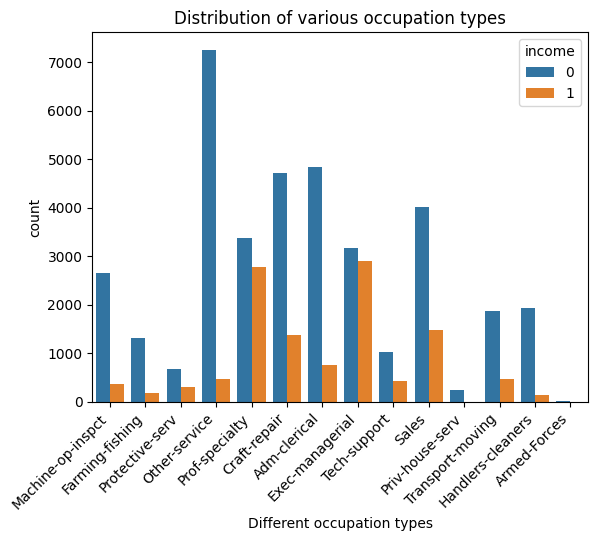

In [ ]:
#Boxplot showing different types of occupations
ax=sns.countplot(df,x='occupation',hue='income')
ax.set_xlabel('Different occupation types')
ax.set_title('Distribution of various occupation types')

# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- This countplot clearly shows that the occupation doesn't influence having a higher income of >50k.

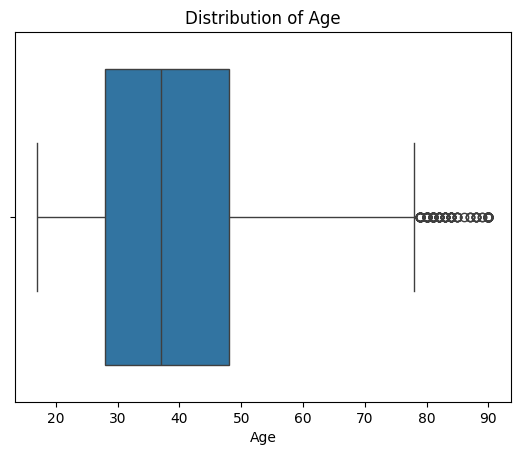

In [ ]:
#Boxplot showing different age groups
ax=sns.boxplot(df,x='age')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age');

- Most people working for an income are within the age range of 28-48 years.
- There are however some few outliers of people earning an income, between the ages of 78-90 years.

## Multivariant Plots

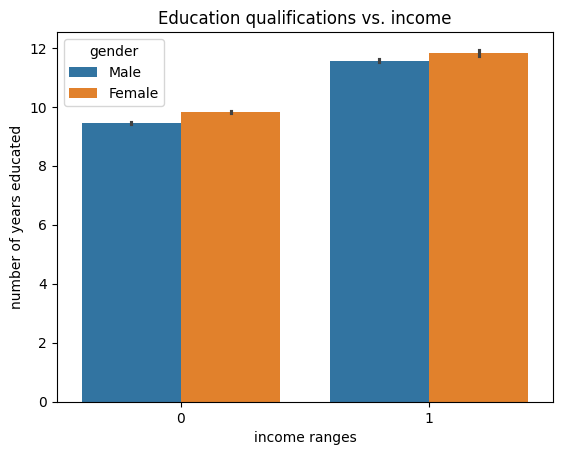

In [ ]:
#Let's explore the relationship between educational-num and income:
ax=sns.barplot(df,x='income',y='educational-num', hue='gender')
ax.set_xlabel('income ranges')
ax.set_ylabel('number of years educated')
ax.set_title('Education qualifications vs. income');

- Females are predominating in both income ranges <=50k & >50k.


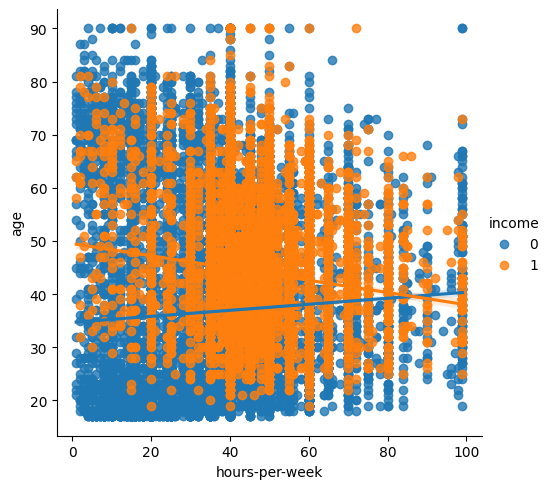

In [ ]:
#Exploring the relationship between hours-per-week and age:
ax=sns.lmplot(df,x='hours-per-week',y='age',hue='income');

- Predominantly people between the ages of 20-62 years and also work for between 38-58 hours per week, secured high incomes of >50k.
- There are also afew outliers for the income group >50K, below 38 hours per week and above 58 hours per week.

Text(0.5, 1.0, 'Correlation heatmap')

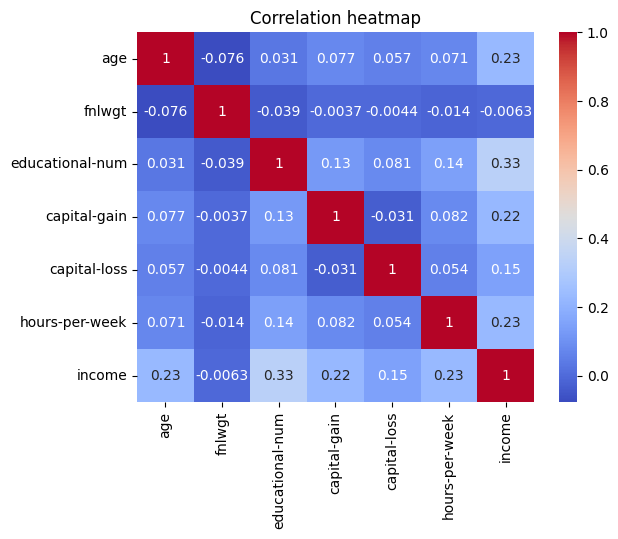

In [ ]:
#Heat map
corr=df.corr(numeric_only=True)
ax=sns.heatmap(corr, annot=True, cmap='coolwarm')
ax.set_title('Correlation heatmap')

- For the numeric features, it can be seen that 'age', 'educational-num','hour-per-week', and 'capital-gain' have a strong positive correlation with 'income'.

## Preprocessing the Data


In [ ]:
# Imports
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
 #Define X and y
target = 'income'
X = df.drop(columns=target)
y = df[target]

In [ ]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
38093,82,Unknown,194590,Tertiary,11,Widowed,Other-service,Not-in-family,White,Female,0,0,8,United-States
43391,30,State-gov,48214,Masters,14,Married,Prof-specialty,Wife,White,Female,0,0,50,United-States
3064,28,Private,340269,High school,9,Married,Craft-repair,Husband,White,Male,3137,0,45,United-States
45606,20,Unknown,133515,College,10,Single,Other-service,Own-child,White,Female,0,0,15,France
2116,39,Private,67433,High school,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11287,54,Self-emp-not-inc,164757,Tertiary,11,Married,Craft-repair,Husband,White,Male,0,0,16,United-States
44775,41,Private,172828,High school,5,Married,Other-service,Husband,White,Male,0,0,55,Outlying-US(Guam-USVI-etc)
38190,22,Private,416356,College,10,Single,Craft-repair,Unmarried,White,Male,0,0,40,United-States
860,46,State-gov,96652,Tertiary,11,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States


In [ ]:
#Getting the object type columns
cat_select = make_column_selector(dtype_include = 'object')
cat_select(X_train)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [ ]:
#Instantiating the One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
#Categorical pipeline
cat_pipe = make_pipeline(ohe)

In [ ]:
#Getting the numeric columns
num_select = make_column_selector(dtype_include='number')
num_select(X_train)

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [ ]:
#The scaler
scaler = StandardScaler()
#The numeric pipeline
num_pipe=make_pipeline(scaler)

In [ ]:
preprocessor = make_column_transformer((cat_pipe,cat_select),
                                       (num_pipe,num_select))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c10fa6df640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c10fa6dfd60>)])

In [ ]:
y_train.value_counts(normalize=True)

income
0    0.760849
1    0.239151
Name: proportion, dtype: float64

- We have imbalanced classes that need to be addressed.

### The Model
- The model we shall use is a Decision Tree classifier.
- We are also going to perform oversampling using SMOTE, inorder to address the imbalanced classes.

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      9268
           1       0.51      0.90      0.65      2930

    accuracy                           0.77     12198
   macro avg       0.73      0.81      0.74     12198
weighted avg       0.85      0.77      0.78     12198



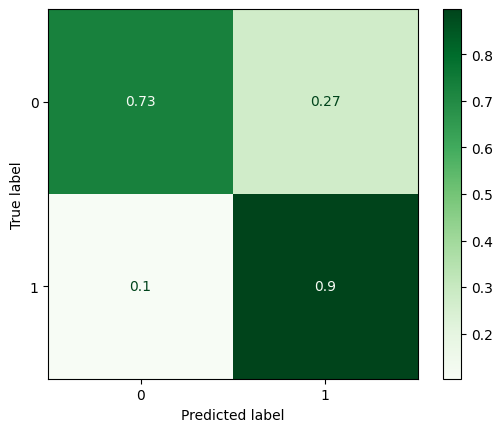

In [ ]:
#import imblearn pipeline
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.over_sampling import SMOTE,SMOTENC
#smote intantiating
smote = SMOTE()
#Instantiate the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5)
#CREATING THE MODEL PIPELINE USING THE PREPROCESSOR,SMOTE AND MODEL
over_sample_pipe = make_sampler_pipeline(preprocessor, smote,clf)

#Fit and evaluate the model pipeline
over_sample_pipe.fit(X_train, y_train)
test_preds = over_sample_pipe.predict(X_test)
#Evaluating my model:
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',cmap='Greens');

- This decision tree model performed well on the test data for the income group <=50K, with an F1-score(the perfect balance between precision and recall)of 0.83.
- The model did not perform well on the test data for the income group >50K, with an F1-score of 0.65.

## Permutation importance
- To visualize the top 10 features.

In [187]:
from sklearn.inspection import permutation_importance
# Fit the Decision Tree Model clf

over_sample_pipe.fit(X, y)

# Compute permutation importance
result = permutation_importance(over_sample_pipe, X, y, n_repeats=30, random_state=42)

# Display importance scores
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X.columns[i]:<20}: {result.importances_mean[i]:.4f}")


marital-status      : 0.0807
educational-num     : 0.0370
capital-gain        : 0.0275
age                 : 0.0133
hours-per-week      : 0.0025
capital-loss        : 0.0022
fnlwgt              : 0.0000
native-country      : 0.0000
gender              : 0.0000
race                : 0.0000
relationship        : 0.0000
occupation          : 0.0000
education           : 0.0000
workclass           : 0.0000


- The top 10 features are: marital-status, educational-num,capital-gain, age, hours-per-week, capital-loss, fnlwgt, native-country, gender and race.

#### Plotting the Top 10 features

In [184]:
# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


#### Feature 1: marital-status

In [192]:
feature1 = "marital-status"
df[feature1].dtype

dtype('O')

<ipython-input-184-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


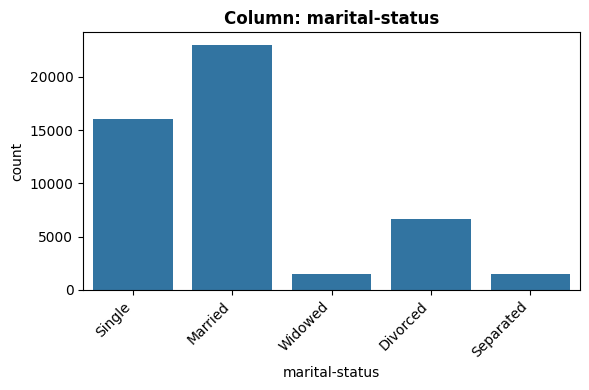

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Married' occurs 23030 times (47.2%)
- Not constant or quasi-constant.


In [190]:
explore_categorical(df, x='marital-status', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

#### Feature 2: educational-num

In [193]:
feature2 = "educational-num"
df[feature2].dtype

dtype('int64')

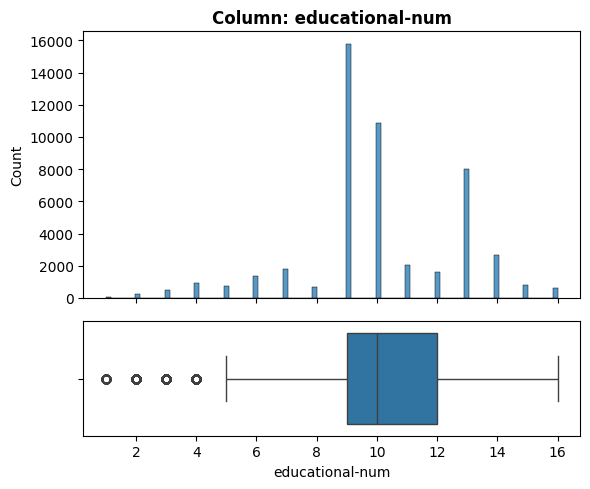

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: '9' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


In [194]:
explore_numeric(df, x='educational-num', figsize=(6,5) );

#### Feature 3: capital-gain

In [195]:
feature3 = "capital-gain"
df[feature3].dtype

dtype('int64')

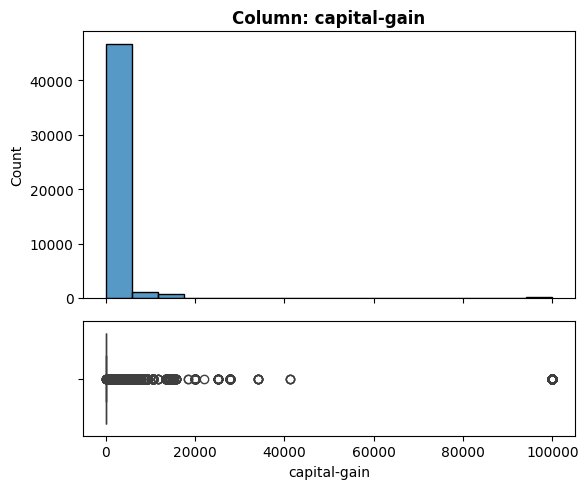

- NaN's Found: 0 (0.0%)
- Unique Values: 123
- Most common value: '0' occurs 44755 times (91.73%)
- Not constant or quasi-constant.


In [196]:
explore_numeric(df, x='capital-gain', figsize=(6,5) );

#### Feature 4: age

In [197]:
# # Confirming the dtype to select correct EDA function
feature4 = "age"
df[feature4].dtype

dtype('int64')

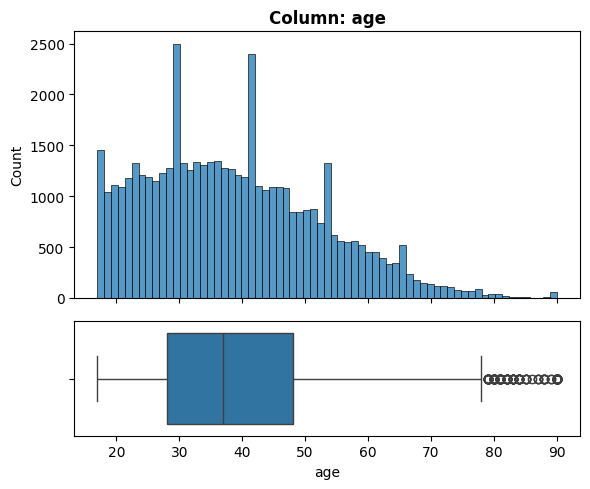

- NaN's Found: 0 (0.0%)
- Unique Values: 74
- Most common value: '36' occurs 1348 times (2.76%)
- Not constant or quasi-constant.


In [ ]:
fig,axes= explore_numeric(df, x='age', figsize=(6,5));

#### Feature 5: hours-per-week

In [198]:
feature5 = "hours-per-week"
df[feature5].dtype

dtype('int64')

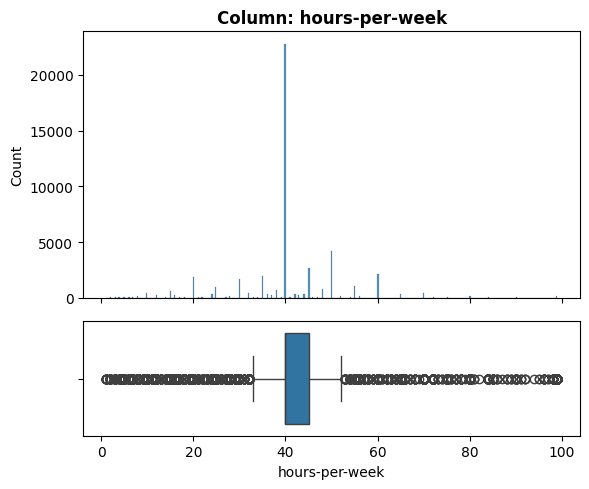

- NaN's Found: 0 (0.0%)
- Unique Values: 96
- Most common value: '40' occurs 22773 times (46.68%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, x='hours-per-week', figsize=(6,5) );

#### Feature 6: capital-loss

In [199]:
feature6 = "capital-loss"
df[feature6].dtype

dtype('int64')

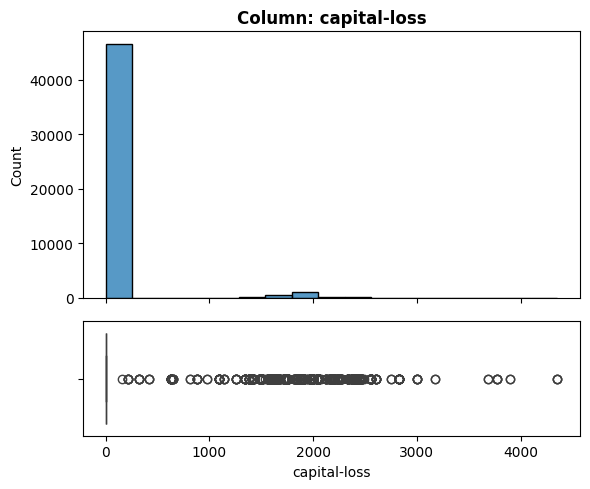

- NaN's Found: 0 (0.0%)
- Unique Values: 99
- Most common value: '0' occurs 46508 times (95.32%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, x='capital-loss', figsize=(6,5) );

#### Feature 7: fnlwgt

In [200]:
feature7 = "fnlwgt"
df[feature7].dtype

dtype('int64')

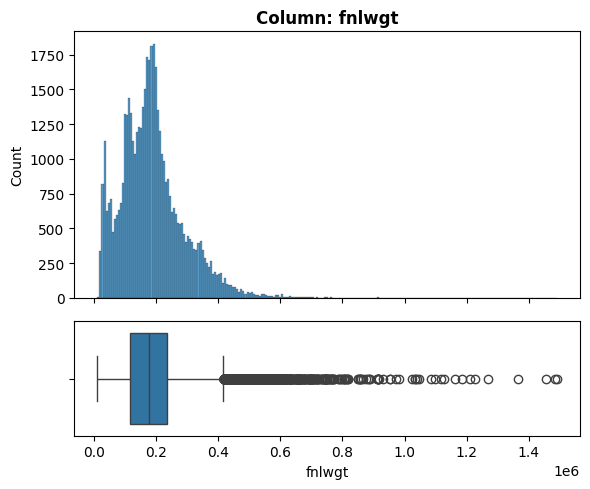

- NaN's Found: 0 (0.0%)
- Unique Values: 28523
- Most common value: '203488' occurs 21 times (0.04%)
- Not constant or quasi-constant.


In [201]:
explore_numeric(df, x='fnlwgt', figsize=(6,5) );

#### Feature 8: native-country

In [202]:
feature8 = "native-country"
df[feature8].dtype

dtype('O')

<ipython-input-184-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


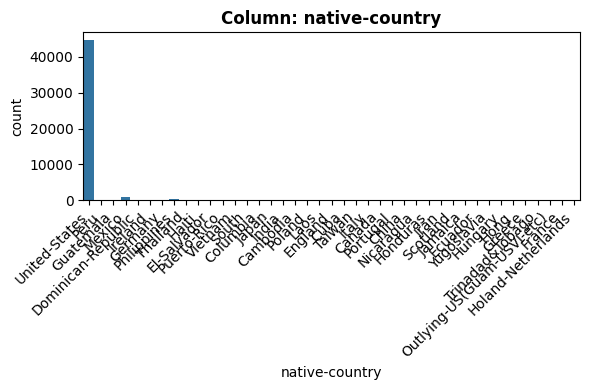

- NaN's Found: 0 (0.0%)
- Unique Values: 41
- Most common value: 'United-States' occurs 44648 times (91.51%)
- Not constant or quasi-constant.


In [203]:
explore_categorical(df, x='native-country', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

#### Feature 9: gender

In [204]:
feature9 = "gender"
df[feature9].dtype

dtype('O')

<ipython-input-184-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


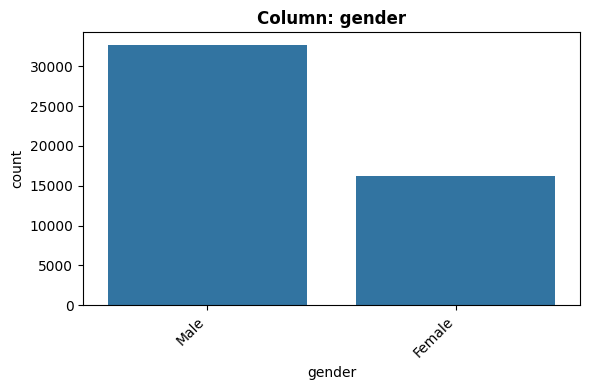

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 32614 times (66.85%)
- Not constant or quasi-constant.


In [205]:
explore_categorical(df, x='gender', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

#### Feature10: race

In [206]:
feature10 = "race"
df[feature10].dtype

dtype('O')

<ipython-input-184-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


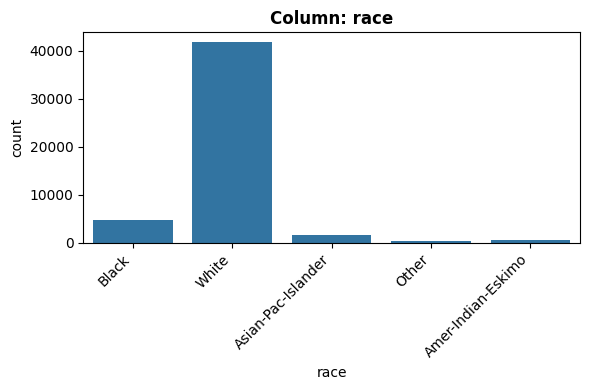

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 41714 times (85.5%)
- Not constant or quasi-constant.


In [207]:
explore_categorical(df, x='race', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

- Do these features make sense based on the business case?
  - The Uni-variant feature plots show that the features plotted are not constant or quasi-constant and also do not have a high cardinality above 98%. We therefore cannot drop them yet.
  - With the business case being to ascertain if the features are contributing factors to an individual’s annual income, we cannot clearly make sense on how these features influence the business case since these are univariant feature plots. However, we can try to make sense of these features using multivariant plots where we plot both the feature and the target= 'income'. Feature Extraction using Principal Component Analysis (PCA) wouldn't suffice since the columns in the dataset are few(15 columns)
  - It can also be highlighted that you need to have some expert knowledge on assessing these demographic factors for individual income levels and also you need to be able to perform some logical sense out of these features E.g. I wouldn't think 'relationship' would play a contributing factor towards a person's income level. But still all these features are worth exploring further.

## Explanatory Visualizations for the 2 most important features: marital-status & educational-num.

### 1. Multivariate plot: Feature vs. Target

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. TARGET"""

def plot_categorical_vs_target(df, x, y='',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

#### Exploring educational-num Vs income

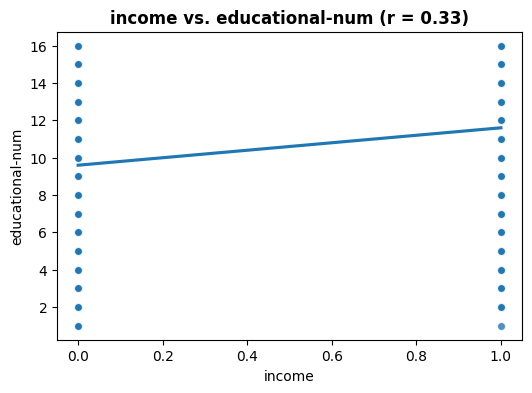

In [ ]:
plot_numeric_vs_target(df, x='income', y='educational-num',
                           figsize=(6,4));

- This multivariant plot reveals that individuals that studied for between 9-12 years, managed to secure an increase in their income levels.

#### Exploring marital-status Vs income

<ipython-input-138-58ba6868da8a>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


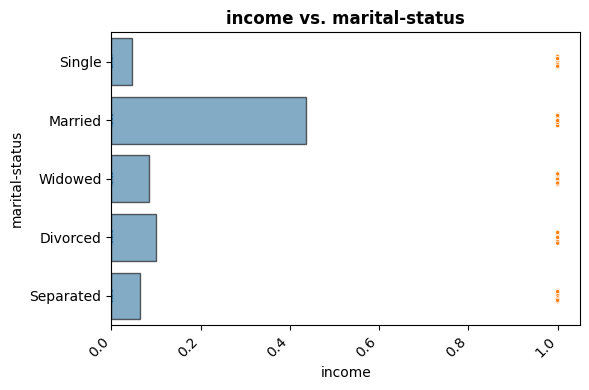

In [208]:
plot_categorical_vs_target(df, x='income', y='marital-status',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None);


- The married vs income multiplot does not reveal alot on how marital-status is a contributing factor to an individual's income. However, I can only tell that Married individuals are predominant in securing an income.

- What opportunities exist for dimensionality reduction or feature selection with this dataset?
   - The opportunity that exists for dimensionality reduction on this dataset is most probably feature selection. The dataset has only 15 columns so we won't perform any feature extraction.

- What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - Cleaning: There was duplicated data,unknown categories that needed to be classified, we needed to also aggregate some categories since some values belonged to the same category.
  - Exploring: No major challenges here since there are few columns to explore and visualize to make out patterns/trends for the business case.
  -Modeling: The model didn't perform well on the test data for predicting income levels of >50K.